In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,root_mean_squared_error,mean_squared_error

In [3]:
df = pd.read_csv('/content/drive/MyDrive/ExcelR/Assignments/ToyotaCorolla - MLR.csv')

In [4]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [6]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [7]:
## Key Statistics
# The Avg. Price is 10730.824513
# the maximum age is 80 and min age is 1
# in the age column 75% of the values are under 70
# Avg kilometer driven is 68533.259749
# Highest driven car is driven 243000 Kms
# Avg weight of car is 1072 kg
# highest weighted car is 1615 kg

In [8]:
df.isnull().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


In [9]:
df.duplicated().sum()

np.int64(1)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.head(2)

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165


In [12]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

Text(0, 0.5, 'Price')

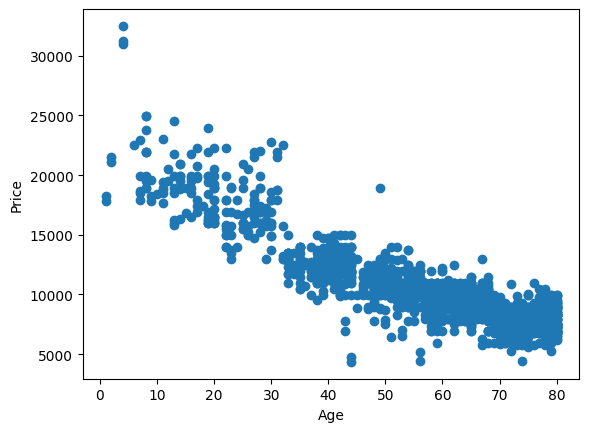

In [13]:
plt.scatter(data=df,x='Age_08_04',y='Price')
plt.xlabel('Age')
plt.ylabel('Price')

In [14]:
## acccording to this scatter plot when age increases price decreases

Text(0, 0.5, 'KM')

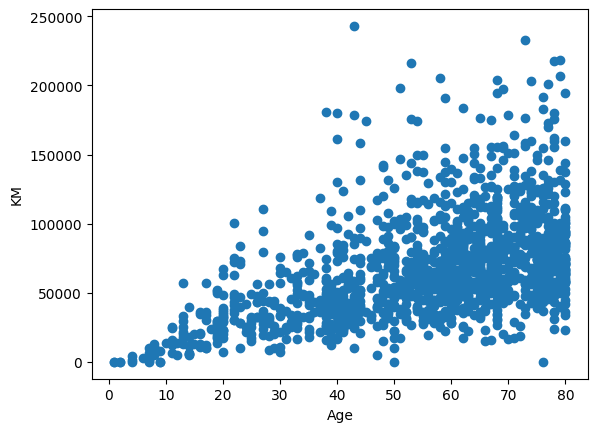

In [15]:
df.dropna(inplace=True)
plt.scatter(data=df,x='Age_08_04',y='KM')
plt.xlabel('Age')
plt.ylabel('KM')

In [16]:
## acccording to this scatter plot km correlated to Age

Text(0.5, 0, 'Km')

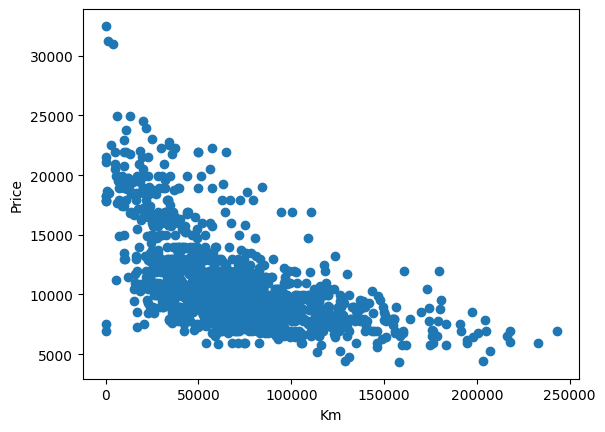

In [17]:
plt.scatter(data=df,x='KM',y='Price')
plt.ylabel('Price')
plt.xlabel('Km')

In [18]:
## acccording to this scatter plot when km decreases price increases

In [19]:
df['Automatic'].value_counts()

,count
Automatic,
0,1355
1,80


In [20]:
df['Cylinders'].value_counts()

,count
Cylinders,
4,1435


In [21]:
df['Gears'].value_counts()

,count
Gears,
5,1389
6,43
3,2
4,1


In [22]:
df['Doors'].value_counts()

,count
Doors,
5,673
3,622
4,138
2,2


In [23]:
df['Weight'].unique()

array([1165, 1170, 1245, 1185, 1105, 1065, 1120, 1100, 1255, 1270, 1110,
       1195, 1180, 1075, 1130, 1275, 1060, 1115, 1265, 1260, 1125, 1155,
       1045, 1480, 1320, 1280, 1135, 1090, 1150, 1085, 1160, 1205, 1084,
       1140, 1095, 1025, 1119, 1080, 1121, 1615, 1067, 1040, 1030, 1055,
       1050, 1103, 1070, 1035, 1015, 1000, 1078, 1079, 1109, 1020, 1010,
       1114, 1172, 1094, 1083])

In [24]:
df['HP'].value_counts()

,count
HP,
110,835
86,249
97,164
72,73
90,36
69,34
107,21
192,11
116,8


In [25]:
df['Fuel_Type'].value_counts()

,count
Fuel_Type,
Petrol,1264
Diesel,154
CNG,17


In [26]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [27]:
len(df['Weight'].unique())

59

<Axes: >

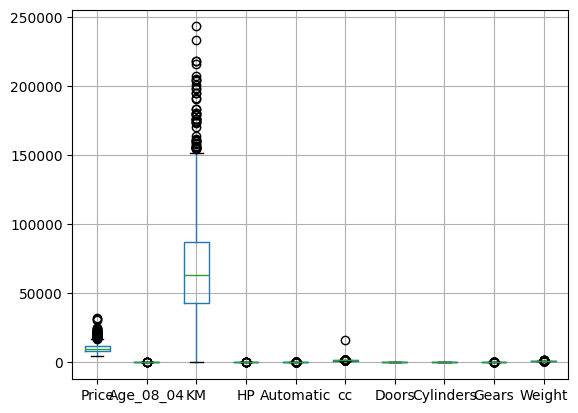

In [28]:
df.boxplot()

In [29]:
def outliers(data):
  data_num = data.select_dtypes(include = 'number')

  for col in data_num:
      q1 = data[col].quantile(0.25)
      q3 = data[col].quantile(0.75)

      IQR = q3-q1
      lower_bound = q1 - 1.5*IQR
      upper_bound = q3 + 1.5*IQR

      data[col] = np.where(data[col] < lower_bound, lower_bound,
                      np.where(data[col] > upper_bound, upper_bound, data[col]))

  return data

In [30]:
df = outliers(df)

<Axes: >

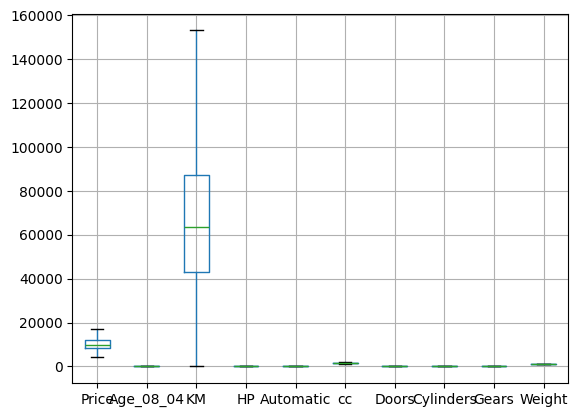

In [31]:
df.boxplot()

In [32]:
df_Continuous = df[['Price', 'Age_08_04', 'KM']]
df_cat = df.drop(columns=df_Continuous)
# Now we have splited continouse and categorical featuers for further preprocessing

In [33]:
df_cat.columns

Index(['Fuel_Type', 'HP', 'Automatic', 'cc', 'Doors', 'Cylinders', 'Gears',
       'Weight'],
      dtype='object')

In [34]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_cat['Fuel_Type'] = encoder.fit_transform(df_cat['Fuel_Type'])
# String to numerical

In [35]:
df_Continuous.corr()
# correlation between continouse columns

,Price,Age_08_04,KM
Price,1.000000,-0.89534,-0.607949
Age_08_04,-0.895340,1.00000,0.530670
KM,-0.607949,0.53067,1.000000


In [36]:
# Price is negatively correlated with age and km

In [37]:
from sklearn.feature_selection import f_regression
f_scores,p_values = f_regression(df_cat,df['Price'])

feature_scores = pd.DataFrame({
    "Feature": df_cat.columns,
    "F-Score": np.round(f_scores, 2),
    "P-Value": np.round(p_values, 4)
})

# For relation between categorical features to the Price


In [38]:
feature_scores.sort_values(by="F-Score", ascending=False)

,Feature,F-Score,P-Value
7,Weight,497.97,0.0000
1,HP,99.18,0.0000
4,Doors,49.66,0.0000
3,cc,24.38,0.0000
0,Fuel_Type,0.85,0.3559
2,Automatic,0.00,1.0000
5,Cylinders,0.00,1.0000
6,Gears,0.00,1.0000


In [39]:
# According to this f-Score and P-Value Automatic,Fuel_Type,Cylinders does not affect price at all
# Weight affects the most
# HP,Doors,cc affects in the moderate amount
# Gears affect just little amount

In [40]:
df.head(2)

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500.0,23.0,46986.0,Diesel,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5
1,13750.0,23.0,72937.0,Diesel,90.0,0.0,1900.0,3.0,4.0,5.0,1152.5


In [41]:
from sklearn.preprocessing import  StandardScaler
scaler = StandardScaler()
df[['KM','cc','Weight']] = pd.DataFrame(scaler.fit_transform(df[['KM','cc','Weight']]),columns=['KM','cc','Weight'])
# Standardizing the data

In [42]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500.0,23.0,-0.595118,Diesel,90.0,0.0,2.024972,3.0,4.0,5.0,2.226997
1,13750.0,23.0,0.152463,Diesel,90.0,0.0,2.024972,3.0,4.0,5.0,2.226997
2,13950.0,24.0,-0.747078,Diesel,90.0,0.0,2.024972,3.0,4.0,5.0,2.226997
3,14950.0,26.0,-0.565908,Diesel,90.0,0.0,2.024972,3.0,4.0,5.0,2.226997
4,13750.0,30.0,-0.839578,Diesel,90.0,0.0,2.024972,3.0,4.0,5.0,2.226997


In [43]:
df[['KM','cc','Weight']].describe()

,KM,cc,Weight
count,1434.000000,1434.000000,1434.000000
mean,0.001158,-0.001412,-0.001553
std,0.999735,0.999266,0.998966
min,-1.948635,-1.531016,-1.817070
25%,-0.709945,-0.938351,-0.756331
50%,-0.120689,0.246978,0.039223
75%,0.559374,0.246978,0.437000
max,2.461859,2.024972,2.226997


In [44]:
df.drop(columns=['Automatic','Fuel_Type','Cylinders'],inplace=True)
# These features does not affect Price at all so we droped them

In [45]:
df.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Weight
0,13500.0,23.0,-0.595118,90.0,2.024972,3.0,5.0,2.226997
1,13750.0,23.0,0.152463,90.0,2.024972,3.0,5.0,2.226997
2,13950.0,24.0,-0.747078,90.0,2.024972,3.0,5.0,2.226997
3,14950.0,26.0,-0.565908,90.0,2.024972,3.0,5.0,2.226997
4,13750.0,30.0,-0.839578,90.0,2.024972,3.0,5.0,2.226997


In [46]:
df.dropna(inplace=True)

In [47]:
target = df[['Price']]
features = df.drop(columns=target)
# Splited target and features for model building

In [48]:
print(target.shape)
print(features.shape)

(1434, 1)
(1434, 7)


In [49]:
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.25,random_state=64)
# splited train and test data

In [50]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1075, 7)
(359, 7)
(1075, 1)
(359, 1)


In [51]:
lr = LinearRegression()
lr.fit(X_train,y_train)
# Training the model using Linear Regression

LinearRegression()

In [52]:
print('Coef_ :-',lr.coef_)
print('Intercept_ :-',lr.intercept_)

Coef_ :- [[-119.08269118 -460.89662202   25.80330609 -241.32134365  131.43533681
     0.          384.06514084]]
Intercept_ :- [14030.66100804]


In [53]:
y_pred = lr.predict(X_test)
print('R2',r2_score(y_test,y_pred))
print('RMSE',root_mean_squared_error(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))

R2 0.8612514874590915
RMSE 1136.5476525676004
MAE 883.4877016016748
MSE 1291740.5665569226


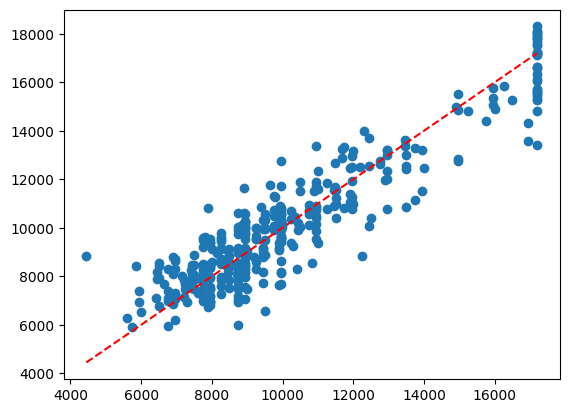

In [54]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')


# GridsearchCV

In [55]:
ridge = Ridge(alpha=15)
lasso = Lasso(alpha=2)

In [56]:
alpha = range(1,100)

In [57]:
param_grid = {'alpha' : alpha}
print(param_grid)

{'alpha': range(1, 100)}


In [ ]:
from sklearn.model_selection import GridSearchCV
rf_grid = GridSearchCV(estimator=lasso,
                       param_grid = param_grid,
                       cv=10,
                       verbose=2,
                       n_jobs=-1)

In [ ]:
rf_grid.fit(X_train,y_train)

Fitting 10 folds for each of 99 candidates, totalling 990 fits


GridSearchCV(cv=10, estimator=Lasso(alpha=2), n_jobs=-1,
             param_grid={'alpha': range(1, 100)}, verbose=2)

In [ ]:
rf_grid.best_params_

{'alpha': 2}

In [ ]:
rf_grid.best_score_

np.float64(0.8291810777914078)

In [ ]:
rf_grid_1 = GridSearchCV(estimator=ridge,
                       param_grid = param_grid,
                       cv=10,
                       verbose=2,
                       n_jobs=-1)
rf_grid_1.fit(X_train,y_train)

Fitting 10 folds for each of 99 candidates, totalling 990 fits


GridSearchCV(cv=10, estimator=Ridge(alpha=15), n_jobs=-1,
             param_grid={'alpha': range(1, 100)}, verbose=2)

In [ ]:
rf_grid_1.best_params_

{'alpha': 15}

In [ ]:
rf_grid_1.best_score_

np.float64(0.8292064055057115)

In [ ]:
ridge = Ridge(alpha=15)
ridge.fit(X_train,y_train)

Ridge(alpha=5)

In [ ]:
print('Coef_ :-',ridge.coef_)
print('Intercept_ :-',ridge.intercept_)

Coef_ :- [-119.33596511 -457.29090635   25.85903166 -236.43768628  130.71105163
    0.          376.77151039]
Intercept_ :- [14042.11020221]


In [ ]:
y_pred_ridge = ridge.predict(X_test)
print('R2',r2_score(y_test,y_pred_ridge))
print('RMSE',root_mean_squared_error(y_test,y_pred_ridge))
print('MAE',mean_absolute_error(y_test,y_pred_ridge))
print('MSE',mean_squared_error(y_test,y_pred_ridge))

R2 0.8612275143928115
RMSE 1136.6458350810176
MAE 883.6425640385052
MSE 1291963.7544070238


In [ ]:
lasso = Lasso(alpha=12)
lasso.fit(X_train,y_train)

Lasso(alpha=12)

In [ ]:
print('Coef_ :-',lasso.coef_)
print('Intercept_ :-',lasso.intercept_)

Coef_ :- [-120.76147075 -442.98849818   26.10259265 -196.32831266  118.04675045
    0.          327.20210307]
Intercept_ :- [14148.17019069]


In [ ]:
y_pred_lasso = lasso.predict(X_test)
print('R2',r2_score(y_test,y_pred_lasso))
print('RMSE',root_mean_squared_error(y_test,y_pred_lasso))
print('MAE',mean_absolute_error(y_test,y_pred_lasso))
print('MSE',mean_squared_error(y_test,y_pred_lasso))

R2 0.8610938785418161
RMSE 1137.1929899504828
MAE 884.8295916188213
MSE 1293207.896392519


In [1]:
# Predict on test.csv
test_pred = lr.predict(test)

# Save results for submission
output = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': test_pred})
output.head()


NameError: name 'lr' is not defined

## **Interview Questions**

Precision=
TP/TP+FP
	​

Out of all the positives your model predicted, how many were actually correct?

It’s about being right when you say YES.

Recall=TP/
TP+FN


Out of all the actual positives, how many did your model catch?

It’s about not missing positives.

* High Precision, Low Recall
* High Recall, Low Precision